## Monitor calibration and gamma correction

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6] #[width, height]

In [13]:
# sampled values
x = [7,	15,	22,	29,	36,	44,	51,	58,	66,	73,	80,	87, 
    95,	102, 109, 117, 124,	131, 138, 146, 153,	160, 168, 175,	
    182, 189, 197, 204,	211, 219, 226, 233,	240, 248, 255]
x = [num/255 for num in x]

# collected values with photometer
y = [4.1,4.6,5.4,6.4,7.5,9.0,10.5,12.0,13.9,15.9,17.7,19.8,22.2,24.7,27.5,30.2,33.5,36.3,39.0,41.9,47.5,
    50.4,55.3,59.4,64.1,68.9,73.0,79.5,84.7,89.9,92.8,100.5,108.9,115.2,121.2]
y = [num/max(y) for num in y]

### plot the data

Text(0, 0.5, 'norm luminance')

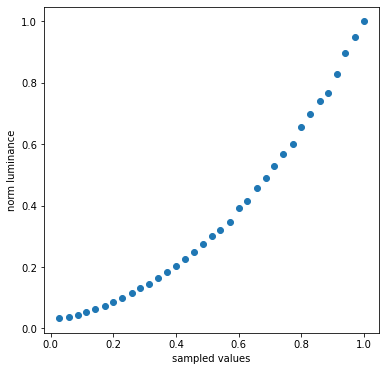

In [14]:
plt.plot(x,y,'o')
plt.xlabel('sampled values')
plt.ylabel('norm luminance')

In [18]:
from scipy.optimize import curve_fit
import scipy.interpolate

# define function to fit
def gamFit(x,n):
    
    fit = x**n
    
    return fit

# find best fitting n
parameters, covariance = curve_fit(gamFit, x, y)

# fit the function
fit = gamFit(x,parameters[0])

### plot the function 

Text(0.5, 1.0, 'param = 1.807477')

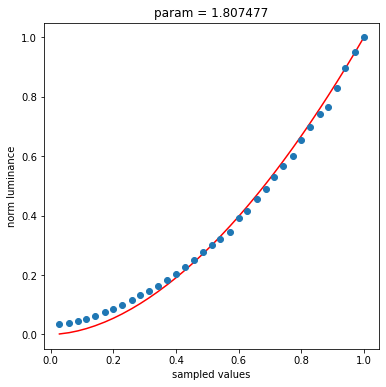

In [31]:
plt.plot(x,fit,'-r')
plt.plot(x,y,'o')
plt.xlabel('sampled values')
plt.ylabel('norm luminance')
plt.title(f'param = %f' % parameters[0])

### Invert the function


[0.15357271 0.16366753 0.17885007 0.19647707 0.21449687 0.23726221
 0.25838504 0.27819661 0.30176455 0.32506384 0.344935   0.36700875
 0.39099081 0.41476939 0.44015766 0.46356602 0.49094079 0.51323549
 0.53401697 0.55563386 0.59556605 0.61541641 0.64783194 0.67398038
 0.70298224 0.73163616 0.75541209 0.79191569 0.82016745 0.84765431
 0.86267506 0.90157104 0.94251335 0.9723007  1.        ]


Text(0.5, 1.0, 'gamma inversion')

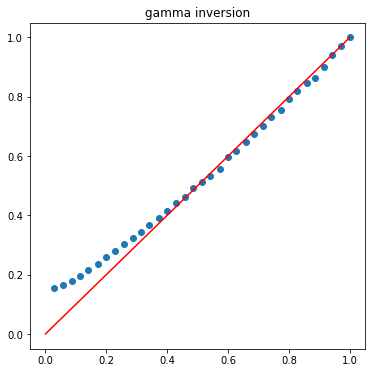

In [77]:
import matplotlib.lines as mlines

invert = max(x)*(y**(1/parameters[0]));
fig, ax = plt.subplots()
ax.plot(x,invert,'o');
line = mlines.Line2D([0, 1], [0, 1], color='red')
ax.add_line(line)
plt.title('gamma inversion')

### Generate gamma table

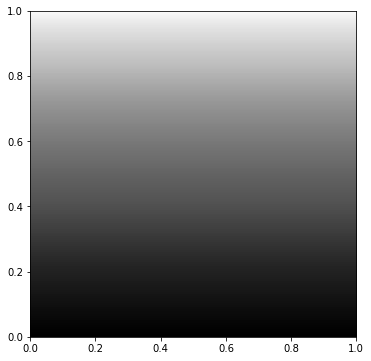

In [107]:
# sample full range
newX = np.arange(0,1,1/255)

#invert with new sampling
invert_full = max(x)*(newX**(1/parameters[0]));

#normalize the inversion
invert_norm = invert_full/max(invert_full)

#since we only care about gray scale we can just repeat the same value for all three color (RGB) columns
GammaTable = np.transpose(np.matlib.repmat(invert_norm,3,1))

#plot for visualization
plt.imshow(GammaTable, extent=[0, 1, 0, 1],cmap='Greys')
